In [1]:
__nbid__ = '0072'
__author__  = 'Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd;
__datasets__ = ['skymapper_dr4', 'gaia_dr3', 'sdss_dr17']
__keywords__ = ['science example', 'crossmatch', 'LMC', 'photometry', 'plot:cmd', 'stars']

# Buscando estrellas extremadamente pobres en metales en la Gran Nube de Magallanes
*Alice Jacques*

#### (_Traducción de [ExtremelyMetalPoorStarsInTheLMC.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/MagellanicClouds/ExtremelyMetalPoorStarsInTheLMC.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#Goals)
* [Avisos Legales y atribuciones](#Disclaimer-&-attribution)
* [Importaciones y configuración](#Imports-and-setup)
* [Autenticación](#Authentication)
* [Consulta de candidatos a EMP en SkyMapper DR4, Gaia DR3 y APOGEE-2](#Query-for-EMP-candidates-in-SkyMapper-DR4,-Gaia-DR3,-and-APOGEE-2)
* [Diferencias en la selección de objetos en el papel versus este notebook](#Object-selection-differences-in-the-paper-vs.-this-notebook)
* [Diagrama sensible a la metalicidad y CMD](#Metallicity-sensitive-diagram-and-CMD)
* [Velocidad radial vs. ángulo de posición](#Radial-velocity-vs.-position-angle)
* [Recursos y referencias](#Resources-and-references)

# Objetivos
El objetivo de este notebook es replicar la investigación realizada en el artículo [Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract) para encontrar estrellas extremadamente pobres en metales (EMP, por sus siglas en inglés) $([Fe/H] \le -3.0)$ en la Gran Nube de Magallanes (LMC por sus siglas en inglés) utilizando el último [SkyMapper](https://skymapper.anu.edu.au/) publicación de datos SkyMapper DR4 (el artículo utiliza DR3). Seguimos los mismos pasos y aplicamos las mismas restricciones de datos que Oh et al. 2023 mediante el uso de fotometría SkyMapper, cortes de paralaje y movimiento propio de [Gaia](https://www.esa.int/Science_Exploration/Space_Science/Gaia), cortes de magnitud de color y un corte sensible a la metalicidad. Luego obtenemos los valores de velocidad radial de [APOGEE-2](https://www.sdss4.org/surveys/apogee-2/) para nuestros candidatos y los comparamos con la curva de rotación de LMC para confirmar que sus objetos som miembros de la LMC. Este notebook utiliza nuestras propias tablas disponibles públicamente alojadas en Astro Data Lab.

# Resumen

En [Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract), los autores presentan los resultados de una búsqueda de estrellas EMP en la Gran Nube de Magallanes (LMC), que pueden proporcionar información crucial sobre las propiedades de las primeras estrellas, así como sobre las condiciones de formación prevalecientes durante las primeras etapas de la formación estelar. Formación en galaxias enanas. Su búsqueda utilizó fotometría SkyMapper DR3, cortes de paralaje y movimiento propio de Gaia, cortes de magnitud de color (seleccionando la región de la rama de la gigante roja) y un corte sensible a la metalicidad. Para confirmar el estado EMP de sus candidatos fotométricos, obtuvieron espectros de baja resolución utilizando la combinación de telescopio ANU de 2,3 m y espectrógrafo WiFeS, a partir de los cuales se identificaron siete estrellas con $[Fe/H] \le −2,75$, incluidas dos con $[Fe/H] \le −3$. Las velocidades radiales, derivadas de las líneas tripletes de Ca II, generalmente coinciden bien con la curva de rotación externa del LMC para los candidatos en su muestra, lo que confirma que sus objetivos son probables miembros del LMC. Sus resultados constituyen las estrellas más pobres en metales encontradas hasta ahora en el LMC.

<a class="anchor" id="attribution"></a>

# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


# Importaciones y configuración

In [3]:
# Biblioteca estándar
from getpass import getpass

# Importaciones de terceros
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# De DataLab
from dl import authClient as ac, queryClient as qc

# Configuración predeterminada de gráficos y pandas.
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

# Consulta de candidatos EMP en SkyMapper DR4, Gaia DR3 y APOGEE-2
Nuestra consulta buscará posibles candidatos a EMP en LMC utilizando datos de [**skymapper_dr4.master**](https://datalab.noirlab.edu/query.php?name=skymapper_dr4.master), [**gaia_dr3.gaia_source**](https://datalab.noirlab.edu/query.php?name=gaia_dr3.gaia_source), y [**sdss_dr17.apogee2_allstar**](https://datalab.noirlab.edu/query.php?name=sdss_dr17.apogee2_allstar) tablas. Las definiciones de columnas para cada tabla se pueden encontrar en los enlaces correspondientes en la oración anterior.

#### Buscaremos objetos en la tabla **skymapper_dr4.master** con las siguientes restricciones:
- $clase\_estrella > 0,9$
> para garantizar que el objeto sea de naturaleza estelar ([Wolf et al. 2018](https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract))
- $banderas \le 3$
> para que no haya problemas aparentes con la fotometría de [SExtractor](https://sextractor.readthedocs.io/en/latest/index.html) ([Wolf et al. 2018](https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract))
- $v\_nbueno \ge 2$
> asegurar al menos dos mediciones en la banda v ([Wolf et al. 2018](https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract))
- $g\_psf\le 16.5$
> para que los candidatos a LMC puedan observarse con alta dispersión en telescopios de clase 8 m con tiempos de integración razonables ([Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract))
- $e\_g\_psf < 0,03$, $e\_i\_psf < 0,03$ y $e\_v\_psf < 0,05$ mag
> como un compromiso entre la precisión fotométrica y el número de candidatos seleccionados ([Wolf et al. 2018](https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract))
- $ebmv\_sfd < 0,25$ mag
> evitar grandes correcciones de enrojecimiento en la fotometría y evitar áreas del cielo donde la fotometría está peor calibrada y frecuentemente afectada por la aglomeración de imágenes ([Da Costa et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.489.5900D/abstract))
- $5 \le \cos^{-1}(\sin(\delta)\sin(\delta_{c}) + \cos(\delta)\cos(\delta_{c})\cos(\alpha-\alpha_{c})) \le 20$
> limitar a una región que tiene un radio de 5 grados a 20 grados desde el centro de LMC (para evitar la aglomeración en las partes internas de la galaxia enana), donde $\delta_{c} = -69,78$ grados y $\alpha_{c} = 81,28$ grados es el centro de la LMC ([Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract))
- $m_{i} \ge -0.2$
> corte del índice de metalicidad usando el índice sensible a la metalicidad: $m_{i} = (v − g)_0 − 1.5(g − i)_0$ (dado que estudios previos han demostrado que las estrellas con índices de metalicidad más negativos que este valor suelen ser estrellas jóvenes con emisión de Ca II H+K, u objetos extragalácticos como objetos cuasi estelares y núcleos galácticos activos ([Da Costa et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.489.5900D/abstract)))
- $0.7 \le (g-i)_0 \le 1.2$
> ya que el RGB en metalicidades más bajas ($[Fe/H] \le -2.5$) no va más allá de $(g-i)_{0} \sim 1.2$ mag para una población de edad avanzada ($\gtrsim 10$ Gyr). El corte de color azul se aplica porque queremos evitar la contaminación de discos enanos jóvenes de metalicidad aproximadamente solar en las partes más azules del CMD ([Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract))
- $self\_dist2 > 7,5$ y $gaia\_dr3\_dist2 > 7,5$
> para que no haya ningún otro SkyMapper DR4 o una fuente adicional de Gaia DR3 dentro de los 7,5 segundos de arco del objetivo ([Wolf et al. 2018](https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract))

#### Luego realice una comparación cruzada con la tabla **gaia_dr3.gaia_source** con las siguientes restricciones:
- $-0.2'' \le \pi \le 0.2''$
> paralaje entre -0,2'' y 0,2'' ([Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract))
- $\sqrt{1.7(\mu_{\alpha} - 1.80)^{2} + 0.8(\mu_{\delta} - 0.37)^{2}} \le 1.0$
> esta ecuación se determinó cuantitativamente, donde midieron el movimiento propio promedio y la dispersión de estrellas ubicadas entre 2 y 6 grados del centro de LMC (para evitar la cinemática del núcleo y la contaminación del halo de la Vía Láctea) ([Oh et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract))

#### Finalmente, une nuestros objetos con la tabla **sdss_dr17.apogee2_allstar** para obtener los valores de velocidad radial, temperatura efectiva, logg y FeH.

In [4]:
query = """
SELECT
    s.object_id, s.gaia_dr3_id1 AS gaia_id, s.raj2000 AS ra, s.dej2000 AS dec, s.radius,
    (ATAN((81.28*(PI()/180) - s.raj2000*(PI()/180))/(-69.78*(PI()/180) - s.dej2000*(PI()/180))))*(180/PI()) AS angle,
    (s.g_psf - 2.986 * s.ebmv_sfd) AS g0, ((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd) AS g_i0, s.ebmv_sfd,
    (((s.v_psf - s.g_psf) - 1.04 * s.ebmv_sfd) - 1.5*((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd)) AS metallicity,
    a.rv_teff, a.rv_logg, a.rv_feh, a.hrv
FROM
    (SELECT *, q3c_dist(raj2000, dej2000, 81.28, -69.78) AS radius
     FROM skymapper_dr4.master
     WHERE q3c_radial_query(raj2000, dej2000, 81.28, -69.78, 20)
     AND NOT q3c_radial_query(raj2000, dej2000, 81.28, -69.78, 5)
     ) AS s
JOIN
    gaia_dr3.gaia_source AS g ON s.gaia_dr3_id1 = g.source_id
LEFT JOIN
    sdss_dr17.apogee2_allstar AS a ON s.gaia_dr3_id1 = a.gaiaedr3_source_id
WHERE
    s.class_star > 0.9
    AND s.flags <= 3
    AND s.v_ngood >= 2
    AND s.g_psf >= 16.5
    AND s.e_g_psf < 0.03
    AND s.e_i_psf < 0.03
    AND s.e_v_psf < 0.05
    AND s.ebmv_sfd < 0.25
    AND s.g_psf != 'NaN'
    AND s.i_psf != 'NaN'
    AND s.v_psf != 'NaN'
    AND s.gaia_dr3_dist2 > 7.5
    AND s.self_dist2 > 7.5
    AND -0.2 <= (((s.v_psf - s.g_psf) - 1.04 * s.ebmv_sfd) - 1.5*((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd))
    AND ((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd) BETWEEN 0.7 AND 1.2
    AND g.parallax BETWEEN -0.2 AND 0.2
    AND SQRT(1.7*POWER(g.pmra - 1.80, 2) + 0.8*POWER(g.pmdec - 0.37, 2)) <= 1.0
ORDER BY 
    s.object_id
"""
print(query)


SELECT
    s.object_id, s.gaia_dr3_id1 AS gaia_id, s.raj2000 AS ra, s.dej2000 AS dec, s.radius,
    (ATAN((81.28*(PI()/180) - s.raj2000*(PI()/180))/(-69.78*(PI()/180) - s.dej2000*(PI()/180))))*(180/PI()) AS angle,
    (s.g_psf - 2.986 * s.ebmv_sfd) AS g0, ((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd) AS g_i0, s.ebmv_sfd,
    (((s.v_psf - s.g_psf) - 1.04 * s.ebmv_sfd) - 1.5*((s.g_psf - s.i_psf) - 1.5 * s.ebmv_sfd)) AS metallicity,
    a.rv_teff, a.rv_logg, a.rv_feh, a.hrv
FROM
    (SELECT *, q3c_dist(raj2000, dej2000, 81.28, -69.78) AS radius
     FROM skymapper_dr4.master
     WHERE q3c_radial_query(raj2000, dej2000, 81.28, -69.78, 20)
     AND NOT q3c_radial_query(raj2000, dej2000, 81.28, -69.78, 5)
     ) AS s
JOIN
    gaia_dr3.gaia_source AS g ON s.gaia_dr3_id1 = g.source_id
LEFT JOIN
    sdss_dr17.apogee2_allstar AS a ON s.gaia_dr3_id1 = a.gaiaedr3_source_id
WHERE
    s.class_star > 0.9
    AND s.flags <= 3
    AND s.v_ngood >= 2
    AND s.g_psf >= 16.5
    AND s.e_g_psf < 0.03
    AND

In [5]:
res = qc.query(sql=query, fmt='pandas', timeout=600)
res_with_rv = res[res['hrv'].notnull()]
print(f"Número de candidatos iniciales al EMP: {len(res)}")
print(f"Número de candidatos EMP iniciales con valores de velocidad radial: {len(res_with_rv)}")

Número de candidatos iniciales al EMP: 1059
Número de candidatos EMP iniciales con valores de velocidad radial: 24


# Diferencias en la selección de objetos en el articulo vs. este notebook
Las siguientes restricciones adicionales se aplicaron en el documento pero no se aplicaron en este notebook (porque estas columnas no existen en SkyMapper DR4, pero sí en SkyMapper DR3):
- $nch\_max = 1$
> para que haya una única fuente para cada filtro
- $ngood\_min \ge 1$
> asegurar al menos una medición en todo ugriz

Una lista de objetos de la selección final del trabajo que NO fueron seleccionados en este notebook y por qué:

| id_objeto | Motivo de la descalificación | Regla |
|-----------|---------------------|-------|
| 500263380 | `v_ngood = 1` | `v_nbueno >= 2` |
| 471915910 | `flags = 2048` | `flags <= 3` |
| 497519424 | `gaia_dr3_dist2 = 1,66` | `gaia_dr3_dist2 > 7.5` |
| 500382880 | `gaia_dr3_dist2 = 3.1` | `gaia_dr3_dist2 > 7.5` |
| 500287810 | `g_psf=16.3745`; `v_nbueno = 1` | `g_psf >= 16.5`; `v_ngood >= 2` |
| 500766372 | `gaia_dr3_dist2 = 7,15` | `gaia_dr3_dist2 > 7.5` |

# Diagrama sensible a la metalicidad y CMD
A continuación, graficaremos nuestros candidatos EMP en un diagrama sensible a la metalicidad con isócronas de Dartmouth de $[Fe/H] = −4$ y $[Fe/H] = −2$. Luego limitaremos aún más nuestra selección de candidatos estableciendo un límite superior de $[Fe/H] = -2$ en el índice de metalicidad para una edad de 12.5 Gyr y $[\alpha/Fe] = 0,4$ ([Dotter et al. 2008](https://ui.adsabs.harvard.edu/abs/2008ApJS..178...89D/abstract)). También graficamos el diagrama color-magnitud de nuestros candidatos.

In [6]:
# Ecuaciones para isócronas
x_iso_2 = np.linspace(0.7,1.2,100)
x_iso_4 = np.linspace(0.7,1.0,100)
FeH_2_mi = 0.0246*np.exp(2.4172*x_iso_2)
FeH_4_mi = 0.219*(x_iso_4**2) - 0.2053*x_iso_4 + 0.0539
FeH_2_g = 3.0952*(x_iso_2**2) - 9.3219*x_iso_2 + 23.118
FeH_4_g = 10.156*(x_iso_4**2) - 22.731*x_iso_4 + 29.089

In [8]:
# Seleccione solo los objetos que sean menores que la isócrona de Dartmouth [Fe/H]=-2
cut = res['metallicity'] < np.interp(res['g_i0'], x_iso_2, FeH_2_mi)
cut_with_rv = res_with_rv['metallicity'] < np.interp(res_with_rv['g_i0'], x_iso_2, FeH_2_mi)
print(f"Número de candidatos EMP finales: {sum(cut)}")
print(f"Número de candidatos EMP finales con valores de velocidad radial: {sum(cut_with_rv)}")
res[cut]

Número de candidatos EMP finales: 243
Número de candidatos EMP finales con valores de velocidad radial: 10


,object_id,gaia_id,ra,dec,radius,angle,g0,g_i0,ebmv_sfd,metallicity,rv_teff,rv_logg,rv_feh,hrv
2,461485704,5209102882538290432,128.684047,-78.619633,14.965406,-79.437132,16.807946,0.708899,0.0962,-0.013595,NaN,NaN,NaN,NaN
4,462121792,5189369741195598848,98.201047,-87.753303,18.081904,-43.272741,16.635085,0.701250,0.1275,0.071825,NaN,NaN,NaN,NaN
5,462187195,5192897799131683456,112.432152,-85.553730,16.568621,-63.144864,16.081631,0.702200,0.1522,0.000212,NaN,NaN,NaN,NaN
12,462652173,5211965495420573952,97.824829,-78.416470,9.671339,-62.435253,16.567719,0.972000,0.1942,0.110532,NaN,NaN,NaN,NaN
24,463937536,5286061549657230336,107.791947,-62.469827,12.819891,74.584803,16.875496,0.920401,0.1282,-0.111831,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,501035245,4771219520621396992,77.979458,-52.887378,16.960697,-11.055383,17.606630,0.720249,0.0165,0.002467,NaN,NaN,NaN,NaN
1041,501132617,4777422419764796928,69.702044,-54.473120,16.170092,-37.103461,16.855710,0.888249,0.0079,0.118212,NaN,NaN,NaN,NaN
1043,501178798,4783085007725953024,74.558752,-52.323482,17.731715,-21.058102,17.841136,0.734451,0.0097,0.143836,NaN,NaN,NaN,NaN
1049,501522293,4772751797449690112,78.905364,-51.947924,17.866273,-7.585254,16.638524,1.015500,0.0160,0.168508,NaN,NaN,NaN,NaN


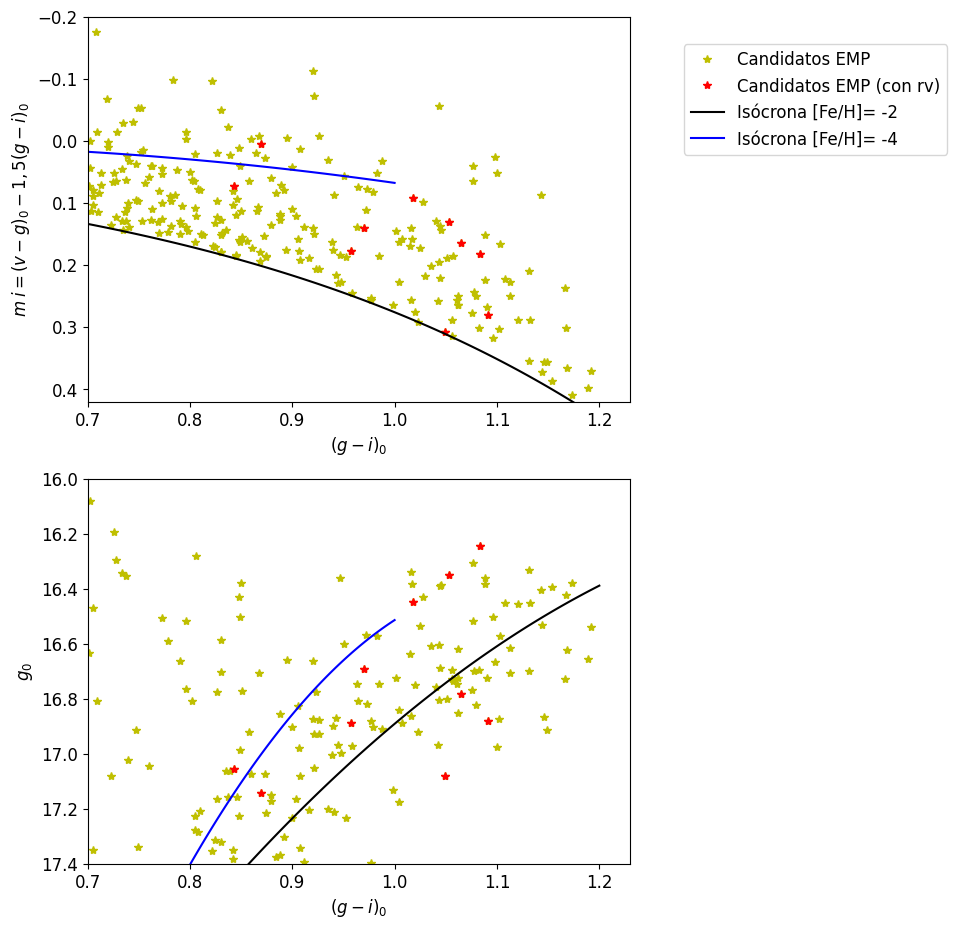

In [9]:
fig, axs = plt.subplots(2,figsize=(7,11))
axs[0].plot(res['g_i0'][cut],res['metallicity'][cut],'y*',label='Candidatos EMP')
axs[0].plot(res_with_rv['g_i0'][cut_with_rv],res_with_rv['metallicity'][cut_with_rv],'r*',label='Candidatos EMP (con rv)')
axs[0].plot(x_iso_2,FeH_2_mi,'k-',label='Isócrona [Fe/H]= -2')
axs[0].plot(x_iso_4,FeH_4_mi,'b-',label='Isócrona [Fe/H]= -4')
axs[0].set_xlim(0.7,1.23)
axs[0].set_ylim(0.42,-0.2)
axs[0].set_ylabel('$ m_ {i} = (v − g)_0 − 1,5 (g − i)_0 $')
axs[0].set_xlabel('$(g-i)_0$')
axs[0].legend(loc='upper right',bbox_to_anchor=(1.6,0.95))
axs[1].plot(res['g_i0'][cut],res['g0'][cut],'y*',label='Candidatos EMP')
axs[1].plot(res_with_rv['g_i0'][cut_with_rv],res_with_rv['g0'][cut_with_rv],'r*',label='Candidatos EMP (con rv)')
axs[1].plot(x_iso_2,FeH_2_g,'k-',label='Isócrona [Fe/H]= -2')
axs[1].plot(x_iso_4,FeH_4_g,'b-',label='Isócrona [Fe/H]= -4')
axs[1].set_xlim(0.7,1.23)
axs[1].set_ylim(17.4,16.0)
axs[1].set_ylabel('$g_0$')
axs[1].set_xlabel('$(g-i)_0$')
plt.show()

*Arriba:* Diagrama de sensibilidad metálica de nuestros candidatos EMP de Magallanes donde $m_{i}$ es el índice sensible a la metalicidad definido como: $m_{i} = (v − g)_0 − 1.5(g − i)_0$. Las curvas azul y negra representan $[Fe/H] = −4$ y $[Fe/H] = −2$ isócronas de Dartmouth para una edad de 12.5 Gyr y $[\alpha/Fe]=0,4$ ([Dotter et al. 2008](https://ui.adsabs.harvard.edu/abs/2008ApJS..178...89D/abstract)). Ambas isócronas han sido calibradas con referencia a los datos de SkyMapper DR3 como se describe en [Da Costa et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.489.5900D/abstract). El límite superior (positivo) en la selección del índice de metalicidad fue establecido por la ubicación de la isócrona de Dartmouth $[Fe/H] = -2$ para una edad de 12.5 Gyr y $[\alpha/H]=0,4$ ([Dotter et al. 2008](https://ui.adsabs.harvard.edu/abs/2008ApJS..178...89D/abstract)). Las estrellas rojas representan los 10 candidatos a EMP que tienen un valor de velocidad radial (rv) de APOGEE-2. Compare esto con la Figura 1 en Oh et al. 2023.

*Abajo:* CMD con la misma descripción que arriba. $g_{0}$ es la magnitud de la banda g que se ha eliminado utilizando E(B-V) derivado de mapas de enrojecimiento OGLE-IV ([Skowron et al. 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..252...23S/abstract)). El módulo de distancia de las isócronas se ha desplazado 18,5 para igualar la distancia LMC.

# Velocidad radial versus ángulo de posición
Aquí comparamos los valores de velocidad radial de nuestros candidatos EMP y los de Oh et al. EMP Candidates 2023. Extrajimos los valores del ángulo de posición y la velocidad radial de Oh et al. 2023 así como [Reggiani et al. 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162..229R/abstract) y los colocamos en un marco de datos de Pandas.

In [10]:
oh_cands = pd.DataFrame(
            {'angle': [-0.1,43.7,13.3,34.9,-31.2,-0.5,-66.0,2.8,-17.4,-70.2],
             'rv': [312.0,352.9,289.5,283.6,286.5,269.3,232.1,284.6,229.7,307.4]})
reggiani_cands = pd.DataFrame(
            {'angle': [-68.121,-66.779,-33.445,-18.456,-16.667,-13.311,-13.311,-7.9418,76.846],
             'rv': [265.04,308.54,186.21,356.45,335.63,303.86,298.52,265.68,319.63]})

In [11]:
# Ecuación para el modelo de rotación LMC de van der Marel+2002
x_rots = np.linspace(-200,150,100)
rots = 7e-10*(x_rots**5) + 1e-07*(x_rots**4) - 6e-05*(x_rots**3) - 0.0061*(x_rots**2) + 1.2142*(x_rots) + 288.47

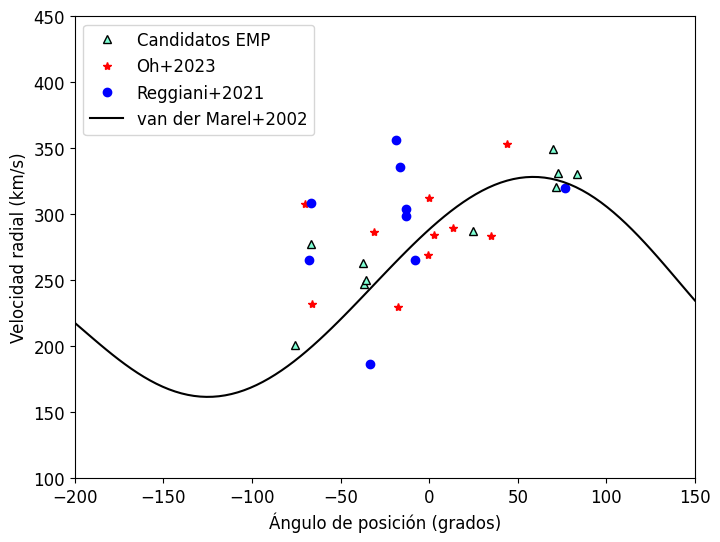

In [12]:
plt.figure(figsize=(8,6))
plt.plot(res_with_rv['angle'][cut_with_rv],res_with_rv['hrv'][cut_with_rv],'^',color='aquamarine',markeredgecolor='black',label='Candidatos EMP')
plt.plot(oh_cands['angle'],oh_cands['rv'],'r*',label='Oh+2023')
plt.plot(reggiani_cands['angle'],reggiani_cands['rv'],'bo',label='Reggiani+2021')
plt.plot(x_rots,rots,'k-',label='van der Marel+2002')
plt.xlim(-200,150)
plt.ylim(100,450)
plt.ylabel('Velocidad radial (km/s)')
plt.xlabel('Ángulo de posición (grados)')
plt.legend(loc='upper left')
plt.show()

La Figura muestra la velocidad radial en función del ángulo de posición en el LMC (medido al este del norte) para nuestros 10 candidatos EMP LMC (marcados con triángulos verdes). Los objetivos EMP de [Reggiani et al. 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162..229R/abstract) y de Oh et al. El año 2023 también se grafica como referencia. La sinusoide negra muestra el modelo de rotación LMC derivado de estrellas de carbono en el disco exterior LMC ([van der Marel et al. 2002](https://ui.adsabs.harvard.edu/abs/2002AJ....124.2639V/abstract)) que se ubican en radios similares a la mayoría de nuestra muestra EMP. Compare este gráfico con la Figura 3 en Oh et al. 2023.

# Recursos y referencias

Da Costa et al. (2019) "The SkyMapper DR1.1 search for extremely metal-poor stars", [MNRAS](https://academic.oup.com/mnras/article/489/4/5900/5568381), 489, 5900: https://ui.adsabs.harvard.edu/abs/2019MNRAS.489.5900D/abstract

Dotter et al. (2008) "The Dartmouth Stellar Evolution Database", [ApJS](http://dx.doi.org/10.1086/589654), 178, 89: https://ui.adsabs.harvard.edu/abs/2008ApJS..178...89D/abstract

Oh et al. (2023) "The SkyMapper search for extremely metal-poor stars in the Large Magellanic Cloud", [MNRAS](https://academic.oup.com/mnras/article/524/1/577/7216506), 542, 577: https://ui.adsabs.harvard.edu/abs/2023MNRAS.524..577O/abstract

Reggiani et al. (2021) "The Most Metal-poor Stars in the Magellanic Clouds Are r-process Enhanced", [AJ](http://dx.doi.org/10.3847/1538-3881/ac1f9a), 162, 229: https://ui.adsabs.harvard.edu/abs/2021AJ....162..229R/abstract

Skowron et al. (2021) "OGLE-ing the Magellanic System: Optical Reddening Maps of the Large and Small Magellanic Clouds from Red Clump Stars", [ApJS](https://iopscience.iop.org/article/10.3847/1538-4365/abcb81), 252, 23, https://ui.adsabs.harvard.edu/abs/2021ApJS..252...23S/abstract

van der Marel et al. (2002) "New Understanding of Large Magellanic Cloud Structure, Dynamics, and Orbit from Carbon Star Kinematics", [AJ](http://dx.doi.org/10.1086/343775), 124, 2639: https://ui.adsabs.harvard.edu/abs/2002AJ....124.2639V/abstract

Wolf et al. (2018) "SkyMapper Southern Survey: First Data Release (DR1)", [Publ. Astron. Soc. Aust.](http://dx.doi.org/10.1017/pasa.2018.5), 35, e010: https://ui.adsabs.harvard.edu/abs/2018PASA...35...10W/abstract